{'스마트폰': 3153, '사용': 301, '사진': 299, '갤럭시': 231, '카메라': 205, '삼각대': 184, '삼성': 178, '스마트': 154, '강의': 132, '촬영': 116, '글': 116, '활용': 110, '제품': 103, '출시': 103, '샤오미': 103, '방법': 102, '앱': 102, '거치대': 102, '미': 99, '형태': 99, '가능': 97, '화면': 96, '기능': 90, '케이스': 85, '색상': 82, '전자': 82, '구분': 79, '외장': 78, '터치스크린': 77, '영상': 74, '슬레이트': 73, '모토': 71, '이용': 70, '하나': 70, '충전': 70, '우리': 67, '중독': 62, '시장': 62, '핸드폰': 60, '아이': 60, '연결': 59, '카봉': 57, '기기': 57, '공개': 56, '게임': 56, '추천': 55, '짐벌': 53, '배터리': 52, '디자인': 52, '구매': 52, '미러': 52, '레드': 52, '동영상': 51, '프로': 51, '내': 49, '시간': 49, '노트': 49, '여행': 48, '위': 48, '보급': 47, '벨벳': 45, '무선': 45, '모바일': 45, '손': 45, '교육': 45, '태블릿': 45, '때문': 44, '분': 44, '이번': 42, '집': 42, '아이폰': 41, '후기': 41, '유튜브': 41, '가격': 41, '사람': 40, '안드로이드': 40, '일상': 40, '생각': 39, '더블': 39, '화웨이': 39, '가성': 38, '요즘': 38, '마이크': 38, '렌즈': 38, '로라': 38, '가지': 37, '나': 37, '블루투스': 36, '번': 36, '플러스': 36, '파일': 36, '세계': 35, '법': 35, '필요': 35, '강': 35, '시리즈': 34, '

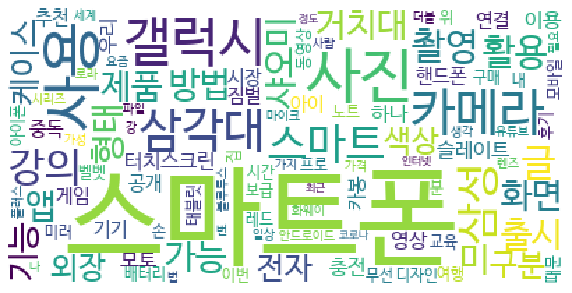

In [5]:
import pandas as pd
df = pd.read_csv('./data/smartphone.csv', encoding='utf-8')
galexy_posts = df.get('Title') + " " + df.get('Description')

from konlpy.tag import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")

galexy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galexy_stop_words = galexy_stop_words.split(' ')
galexy_stop_words[0:10]

# 불용어 제거
galexy_nouns = []
for post in galexy_posts:
    for noun in tagger.nouns(post):
        if noun not in galexy_stop_words:
            galexy_nouns.append(noun)

galexy_nouns[0:10]

from collections import Counter
num_top_nouns = 100
galexy_nouns_counter = Counter(galexy_nouns)
galexy_top_nouns = dict(galexy_nouns_counter.most_common(num_top_nouns))
print(galexy_top_nouns)

from wordcloud import WordCloud
galexy_wc = WordCloud(background_color="white", font_path='./font/NanumBarunGothic.ttf')
galexy_wc.generate_from_frequencies(galexy_top_nouns)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(galexy_wc)

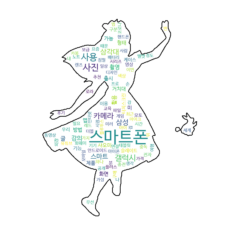

In [6]:
# 마스크 이미지 로드
import numpy as np
from PIL import Image
from os import path
import os

mask = np.array(Image.open("alice_mask.png"))

# 워드 클라우드 설정
alice_wc = WordCloud(background_color="white", mask=mask, contour_width=3, 
              font_path='./font/NanumBarunGothic.ttf')

alice_wc.generate_from_frequencies(galexy_top_nouns)

# 이미지 표시
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis("off")

# 이미지 저장
alice_wc.to_file("alice_smartphone.png")